#  Factors Influencing ACT Scores

##  Brief introduction to the data

The data is based on the ACT (which stands for American College Testing) scores from the high schools in California  for the years 2014-2018.
The data contains:
* High school geographic information ( District name, county, city, longitute, latitude)
* Average ACT scores for different subject groups ( English, Reading, Math and Science) and overall ACT scores from 2014 to 2018.
* Total number of students enrolled in high schools.
* Percentage of students from different ethnicities.
* Percentage of free and reduced price lunch offered students which represent the students with low income.
* Percentage of the teachers in their first or second years.

Performing the Exploratory Data Analysis in order to address these questions:
1. What is the distribution of the scores?
2. Which high schools received the highest and lowest overall scores? 
3. Which counties have the highest and lowest performing schools? 
4. On which subjects are the schools performing better?
5. Is there an increase of the success level of schools with time?  
6. What kind of factors influence success levels? 
   *  Ethnicity
   *  Number of low income students
   *  New teacher ratios
   *  Population of the schools
7. Are the parent ratings and great schools ratings related to the school success?

# Exploratory Data Analysis

## Importing Basic Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import HTML,display
import folium 
from folium.plugins import MarkerCluster
sns.set()
sns.set_context("notebook", font_scale=1.25)

In [2]:
# Setting options to display all column and row names
pd.options.display.max_columns=None
pd.options.display.max_rows=None

## Necessary Functions

In [3]:
def ecdf(data):
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

def pearson_r(x, y):
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)
    return corr_mat[0,1]

## Load the data and perform basic operations

In [4]:
data = pd.read_csv('data.csv')

In [5]:
data.head()

,Year,Sname,gsId,Dname,County,City,Lat,Lon,Type,Enrollment,Enroll12,Percent Teachers InFirst SecondYear,Plan504,FreeAnd Reduced PriceLunch,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,PctGE21,ActSat Number Participation,Asian,"Black, non-Hispanic",Hispanic,Multiracial,Native American or Native Alaskan,Native Hawaiian or Other Pacific Islander,"White, non-Hispanic",gsRating,ParentRating
0,2014,Granada High,148,Livermore Valley Joint Unified,Alameda,Livermore,37.675205,-121.78984,public,2059,467,9.1,2.9,15.06,108,26.0,26.0,26.0,26.0,99,91.67,479,9.96,1.55,24.58,7.29,0.34,0.34,55.95,9.0,4.0
1,2015,Granada High,148,Livermore Valley Joint Unified,Alameda,Livermore,37.675205,-121.78984,public,2059,454,9.1,2.9,15.06,114,25.0,25.0,26.0,25.0,95,83.33,479,9.96,1.55,24.58,7.29,0.34,0.34,55.95,9.0,4.0
2,2016,Granada High,148,Livermore Valley Joint Unified,Alameda,Livermore,37.675205,-121.78984,public,2059,473,9.1,2.9,15.06,157,26.0,26.0,26.0,25.0,139,88.54,479,9.96,1.55,24.58,7.29,0.34,0.34,55.95,9.0,4.0
3,2017,Granada High,148,Livermore Valley Joint Unified,Alameda,Livermore,37.675205,-121.78984,public,2059,470,9.1,2.9,15.06,158,26.0,26.0,26.0,25.0,137,86.71,479,9.96,1.55,24.58,7.29,0.34,0.34,55.95,9.0,4.0
4,2018,Granada High,148,Livermore Valley Joint Unified,Alameda,Livermore,37.675205,-121.78984,public,2059,513,9.1,2.9,15.06,148,25.0,26.0,26.0,25.0,126,85.14,479,9.96,1.55,24.58,7.29,0.34,0.34,55.95,9.0,4.0


In [6]:
data.columns

Index(['Year', 'Sname', 'gsId', 'Dname', 'County', 'City', 'Lat', 'Lon',
       'Type', 'Enrollment', 'Enroll12', 'Percent Teachers InFirst SecondYear',
       'Plan504', 'FreeAnd Reduced PriceLunch', 'NumTstTakr', 'AvgScrEng',
       'AvgScrRead', 'AvgScrMath', 'AvgScrSci', 'NumGE21', 'PctGE21',
       'ActSat Number Participation', 'Asian', 'Black, non-Hispanic',
       'Hispanic', 'Multiracial', 'Native American or Native Alaskan',
       'Native Hawaiian or Other Pacific Islander', 'White, non-Hispanic',
       'gsRating', 'ParentRating'],
      dtype='object')

Adding a column to the data that shows the overall average act scores

In [7]:
col = data.loc[: , 'AvgScrEng':'AvgScrSci']
data['AvgScr'] = col.mean(axis=1)

Dividing the data into three subsets for accessing the information easier.

In [8]:
df1 = data[['Sname', 'gsId', 'Dname', 'County', 'City', 'Lat', 'Lon', 'Type', 'Percent Teachers InFirst SecondYear',
           'Plan504', 'FreeAnd Reduced PriceLunch', 'gsRating', 'ParentRating']]
df2 = data[['Year','Sname','Dname','County','Enroll12','NumTstTakr', 'AvgScrEng','AvgScrRead', 'AvgScrMath', 
            'AvgScrSci', 'NumGE21', 'PctGE21','AvgScr']]
df3 = data[['Sname','Enrollment', 'Asian','Black, non-Hispanic', 'Hispanic', 'Multiracial',
            'Native American or Native Alaskan', 'Native Hawaiian or Other Pacific Islander', 'White, non-Hispanic']]

The values in df1 and df3 columns are repeated for every year. (2014-2018)

In [9]:
df1 = df1.drop_duplicates(keep='first')
df3 = df3.drop_duplicates(keep='first')

In [10]:
data.head()

,Year,Sname,gsId,Dname,County,City,Lat,Lon,Type,Enrollment,Enroll12,Percent Teachers InFirst SecondYear,Plan504,FreeAnd Reduced PriceLunch,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,PctGE21,ActSat Number Participation,Asian,"Black, non-Hispanic",Hispanic,Multiracial,Native American or Native Alaskan,Native Hawaiian or Other Pacific Islander,"White, non-Hispanic",gsRating,ParentRating,AvgScr
0,2014,Granada High,148,Livermore Valley Joint Unified,Alameda,Livermore,37.675205,-121.78984,public,2059,467,9.1,2.9,15.06,108,26.0,26.0,26.0,26.0,99,91.67,479,9.96,1.55,24.58,7.29,0.34,0.34,55.95,9.0,4.0,26.00
1,2015,Granada High,148,Livermore Valley Joint Unified,Alameda,Livermore,37.675205,-121.78984,public,2059,454,9.1,2.9,15.06,114,25.0,25.0,26.0,25.0,95,83.33,479,9.96,1.55,24.58,7.29,0.34,0.34,55.95,9.0,4.0,25.25
2,2016,Granada High,148,Livermore Valley Joint Unified,Alameda,Livermore,37.675205,-121.78984,public,2059,473,9.1,2.9,15.06,157,26.0,26.0,26.0,25.0,139,88.54,479,9.96,1.55,24.58,7.29,0.34,0.34,55.95,9.0,4.0,25.75
3,2017,Granada High,148,Livermore Valley Joint Unified,Alameda,Livermore,37.675205,-121.78984,public,2059,470,9.1,2.9,15.06,158,26.0,26.0,26.0,25.0,137,86.71,479,9.96,1.55,24.58,7.29,0.34,0.34,55.95,9.0,4.0,25.75
4,2018,Granada High,148,Livermore Valley Joint Unified,Alameda,Livermore,37.675205,-121.78984,public,2059,513,9.1,2.9,15.06,148,25.0,26.0,26.0,25.0,126,85.14,479,9.96,1.55,24.58,7.29,0.34,0.34,55.95,9.0,4.0,25.50


In [11]:
round(df2.describe(percentiles=[0.025, 0.25,  0.5,   0.75,  0.975]),2)

,Year,Enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,PctGE21,AvgScr
count,4218.00,4218.00,4218.00,4218.00,4218.00,4218.00,4218.00,4218.00,4218.00,4218.00
mean,2016.02,386.49,101.00,20.86,21.70,21.73,21.10,58.65,52.74,21.35
std,1.41,203.80,75.47,3.89,3.47,3.27,3.09,62.09,25.43,3.38
min,2014.00,0.00,11.00,8.00,11.00,14.00,11.00,0.00,0.00,11.25
2.5%,2014.00,54.43,16.00,14.00,15.00,16.00,16.00,3.00,6.67,15.25
25%,2015.00,222.00,45.00,18.00,19.00,19.00,19.00,17.00,31.72,18.75
50%,2016.00,397.00,83.00,21.00,22.00,21.00,21.00,36.00,54.36,21.25
75%,2017.00,527.00,135.00,24.00,24.00,24.00,23.00,77.00,74.48,23.75
97.5%,2018.00,798.00,290.00,28.00,28.00,28.00,27.00,238.00,93.54,28.00
max,2018.00,1158.00,660.00,32.00,31.00,32.00,31.00,387.00,100.00,31.50


## 1. What is the distribution of the scores?

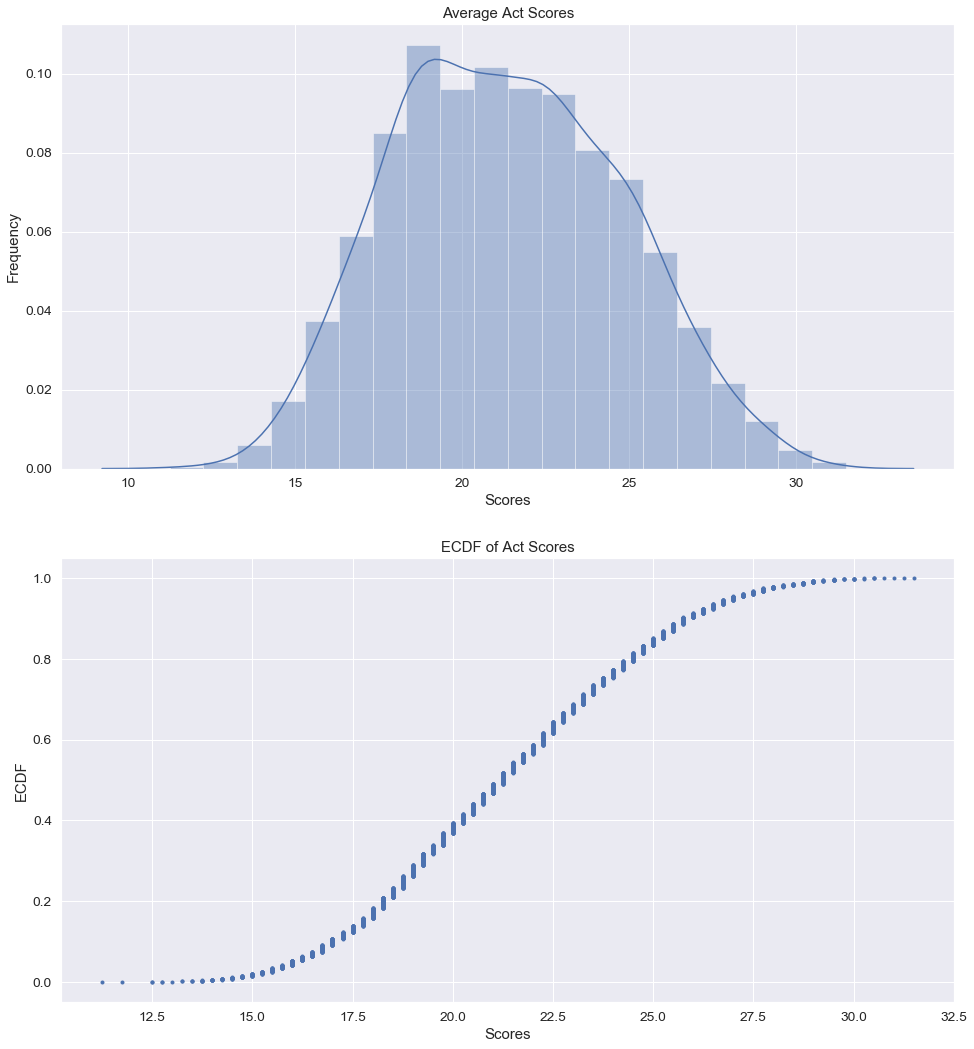

In [12]:
fig, axes = plt.subplots(2,1, figsize=(16,18))

_ = sns.distplot(data['AvgScr'], ax=axes[0], bins=20)
_ = axes[0].set_xlabel('Scores')
_ = axes[0].set_ylabel('Frequency')
_ = axes[0].set_title('Average Act Scores')

e1, e2 = ecdf(data['AvgScr'])
_ = axes[1].plot(e1, e2,marker = '.',linestyle = 'none')
_ = axes[1].set_title('ECDF of Act Scores')
_ = axes[1].set_xlabel('Scores')
_ = axes[1].set_ylabel('ECDF')
plt.show()

We assume that the average scores are normally distributed, and this assumption stands correct looking at the graphs.

## 2. Which  high schools received the highest and lowest overall scores?

Corresponding values for the [2.5,25,50,75,97.5] percentiles are: [15.25 18.75 21.25 23.75 28.  ]


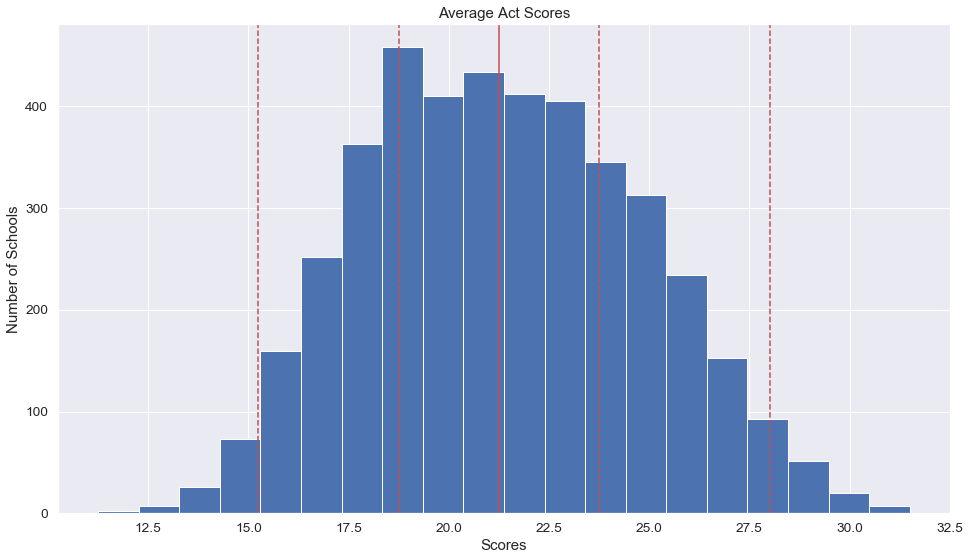

In [13]:
plt.figure(figsize=(16,9))

_ = plt.hist(data['AvgScr'], bins=20)
plt.xlabel('Scores')
plt.ylabel('Number of Schools')
plt.title('Average Act Scores')

# Calculaing the percentiles of overall mean act scores
percentiles = np.array([2.5,25,50,75,97.5])
perct = np.percentile(data['AvgScr'],percentiles)
print('Corresponding values for the [2.5,25,50,75,97.5] percentiles are: {}'.format(perct))


# Showing the percentiles on the graph
plt.axvline(perct[0], color='r', linestyle='--')
plt.axvline(perct[1], color='r', linestyle='--')
plt.axvline(perct[2], color='r', linestyle='-')
plt.axvline(perct[3], color='r', linestyle='--')
plt.axvline(perct[4], color='r', linestyle='--')

plt.show()

In [14]:
data[['AvgScr']].describe(percentiles=[0.025, 0.25,  0.5,   0.75,  0.975]).transpose()

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max
AvgScr,4218.0,21.34744,3.383362,11.25,15.25,18.75,21.25,23.75,28.0,31.5


## Highest Performing Schools

#### These are the schools which received 28.0 or higher which is the top 2.5%  of the overall average Act scores

In [15]:
high_scr = data[df2['AvgScr'] >= perct[4]]
high_scr = high_scr[['Sname','gsId','County','Lon','Lat','gsRating','ParentRating']].drop_duplicates()
high_scr.head().style.hide_index()

Sname,gsId,County,Lon,Lat,gsRating,ParentRating
Piedmont High,275,Alameda,-122.233,37.8237,10,4
Redwood High,3490,Marin,-122.533,37.9382,10,4
Tamalpais High,3492,Marin,-122.527,37.8913,8,4
Foothill High,282,Alameda,-121.92,37.6716,9,4
Amador Valley High,279,Alameda,-121.873,37.6683,9,4


In [16]:
m = folium.Map(width=900,height=600,location=[36.778259, -119.417931],zoom_start=7)
mc = MarkerCluster().add_to(m)

high_scr['desc'] = high_scr['Sname']+" GreatschoolsRating:"+high_scr['gsRating'].apply(str)+" ParentRating:"+high_scr['ParentRating'].apply(str)

for each in high_scr.iterrows():
    folium.Marker([each[1]['Lat'],each[1]['Lon']],popup=each[1]['desc']).add_to(mc)

display(m)

## Lowest Performing Schools

#### These are the schools which received 15.25 or lower which is 2.5% of the average scores

In [17]:
low_scr = data[df2['AvgScr'] <= perct[0]]
low_scr = low_scr[['Sname','gsId','County','Lon','Lat','gsRating','ParentRating']].drop_duplicates()
low_scr.head().style.hide_index()

Sname,gsId,County,Lon,Lat,gsRating,ParentRating
Oakland Unity High,12385,Alameda,-122.185,37.7737,5,4
McClymonds High,15024,Alameda,-122.279,37.8179,2,4
Coliseum College Prep Academy,17091,Alameda,-122.193,37.762,4,3
Castlemont High,25806,Alameda,-122.163,37.7595,1,nan
Avenal High,1182,Kings,-120.13,36.0089,3,3


In [18]:
m = folium.Map(width=900,height=600,location=[36.778259, -119.417931],zoom_start=7)
mc = MarkerCluster().add_to(m)

low_scr['desc'] = low_scr['Sname']+" GreatschoolsRating:"+low_scr['gsRating'].apply(str)+" ParentRating:"+low_scr['ParentRating'].apply(str)

for each in low_scr.iterrows():
    folium.Marker([each[1]['Lat'],each[1]['Lon']],popup=each[1]['desc']).add_to(mc)

display(m)

In [19]:
round(len(high_scr['Sname'].unique())/len(df2['Sname'].unique())*100,1)

4.5

In [20]:
round(len(low_scr['Sname'].unique())/len(df2['Sname'].unique())*100,1)

6.3

About 4.5% of the schools received 28.00 (top 2.5 %) or above, 6.3% of the schools received 15.00 (2.5%) or less at least once between 2014 and 2018.

## 3. Which counties have the highest and lowest performing schools?

In [21]:
print('The highest performing schools are in the following counties: {}' .format(set(high_scr['County'])))

The highest performing schools are in the following counties: {'Marin', 'Sacramento', 'San Mateo', 'Nevada', 'Orange', 'San Francisco', 'Los Angeles', 'Contra Costa', 'Alameda', 'San Diego', 'Santa Clara', 'Santa Cruz'}


In [22]:
print('The lowest performing schools are in the following counties: {}' .format(set(low_scr['County'])))

The lowest performing schools are in the following counties: {'Fresno', 'Kings', 'San Joaquin', 'Sacramento', 'San Bernardino', 'San Francisco', 'Los Angeles', 'Riverside', 'Contra Costa', 'Tulare', 'Alameda', 'San Diego', 'Santa Clara'}


## 4. On which subjects are the schools performing better?

In [23]:
perc =[0.025, 0.25, 0.5, 0.75, 0.975]
round(data[['AvgScrEng','AvgScrRead', 'AvgScrMath', 'AvgScrSci']].describe(percentiles = perc),2)

,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci
count,4218.00,4218.00,4218.00,4218.00
mean,20.86,21.70,21.73,21.10
std,3.89,3.47,3.27,3.09
min,8.00,11.00,14.00,11.00
2.5%,14.00,15.00,16.00,16.00
25%,18.00,19.00,19.00,19.00
50%,21.00,22.00,21.00,21.00
75%,24.00,24.00,24.00,23.00
97.5%,28.00,28.00,28.00,27.00
max,32.00,31.00,32.00,31.00


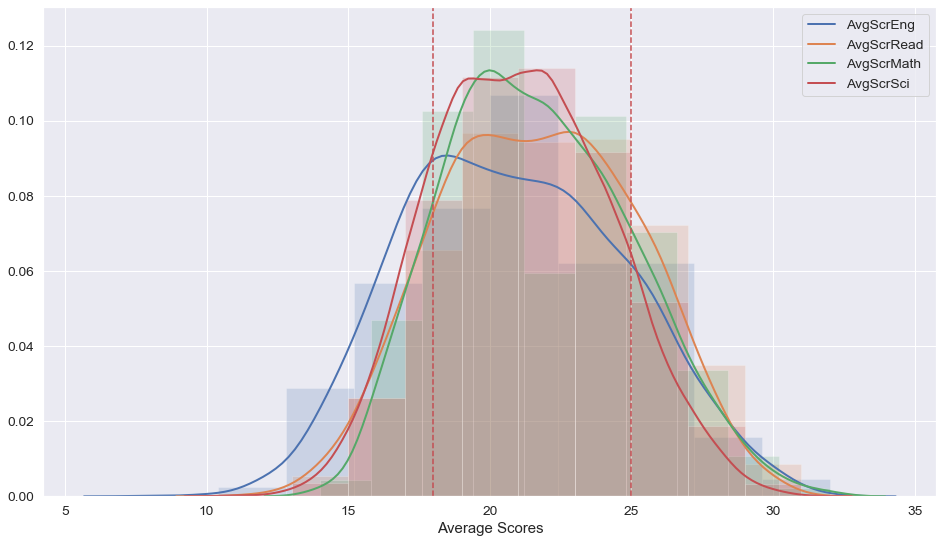

In [24]:
#sns.set()
plt.figure(figsize=(16,9))

_ = sns.distplot(df2.AvgScrEng, bins=10, kde_kws={"lw": 2, "label": 'AvgScrEng'}, hist_kws={"alpha": 0.2})
_ = sns.distplot(df2.AvgScrRead, bins=10, kde_kws={"lw": 2, "label": 'AvgScrRead'}, hist_kws={"alpha": 0.2})
_ = sns.distplot(df2.AvgScrMath, bins=10, kde_kws={"lw": 2, "label": 'AvgScrMath'}, hist_kws={"alpha": 0.2})
_ = sns.distplot(df2.AvgScrSci, bins=10, kde_kws={"lw": 2, "label": 'AvgScrSci'}, hist_kws={ "alpha": 0.2})

_ = plt.axvline(x=18, color='r', linestyle='--')
_ = plt.axvline(x=25, color='r', linestyle='--')
plt.xlabel('Average Scores')

plt.show()

The schools in the low score range (<=18) are performing better in English.<br>
The schools in the middle score range (18-25) are performing better in Math and Science, worse in English.<br>
The schools in the high score range (>=25) are performing worse in Science.

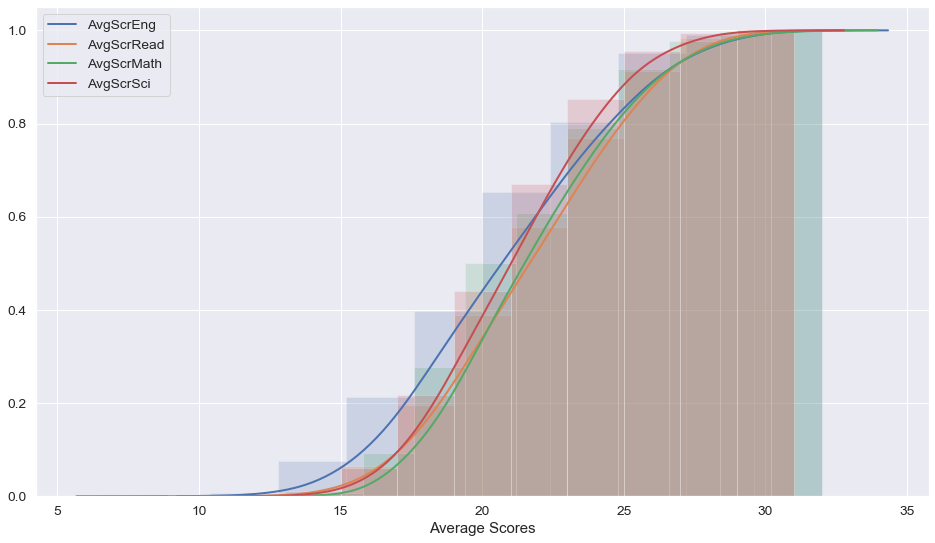

In [25]:
#sns.set()
plt.figure(figsize=(16,9))

_ = sns.distplot(df2.AvgScrEng,bins=10,  axlabel='Fig',
            hist_kws={'cumulative': True, "alpha": 0.2}, kde_kws={"lw": 2,'cumulative': True,"label": 'AvgScrEng'})
_ = sns.distplot(df2.AvgScrRead,bins=10,  axlabel='Fig',
            hist_kws={'cumulative': True, "alpha": 0.2}, kde_kws={"lw": 2,'cumulative': True,"label": 'AvgScrRead'})
_ = sns.distplot(df2.AvgScrMath,bins=10,  axlabel='Fig',
            hist_kws={'cumulative': True, "alpha": 0.2}, kde_kws={"lw": 2,'cumulative': True,"label": 'AvgScrMath'})
_ = sns.distplot(df2.AvgScrSci,bins=10,  axlabel='Fig',
            hist_kws={'cumulative': True, "alpha": 0.2}, kde_kws={"lw": 2,'cumulative': True,"label": 'AvgScrSci'})
plt.xlabel('Average Scores')

plt.show()

This graph is another representation of scores in different subjects. At the first glance, we can say that almost 60% of the schools received about 22 or less in English. About 40% of the schools received 22.0 or more in Science. This number is less for the other subject tests.

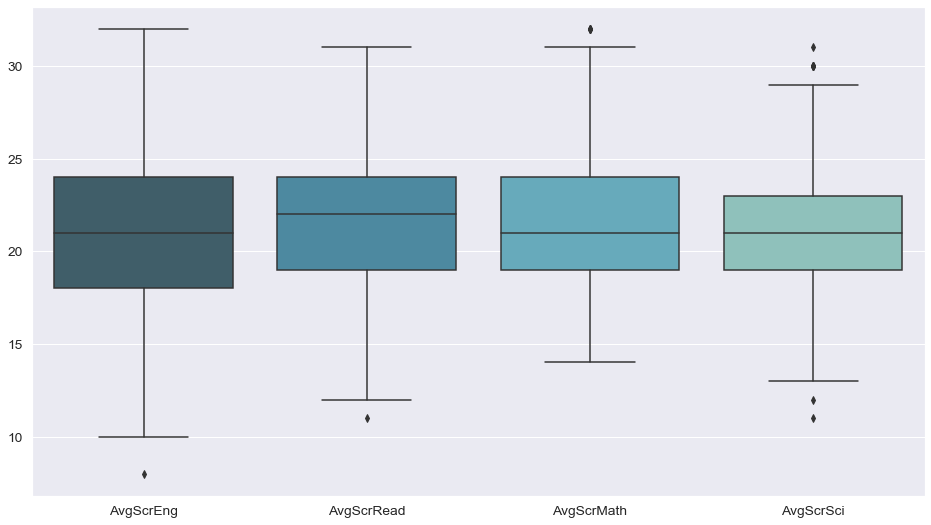

In [26]:
plt.figure(figsize=(16,9))
d = df2[['AvgScrEng','AvgScrRead', 'AvgScrMath', 'AvgScrSci']]
ax = sns.boxplot(data=d, palette="GnBu_d")
#ax = sns.palplot(sns.light_palette((210, 90, 60), input="husl"))

## 5. Is there an increase of the success level of schools with time?

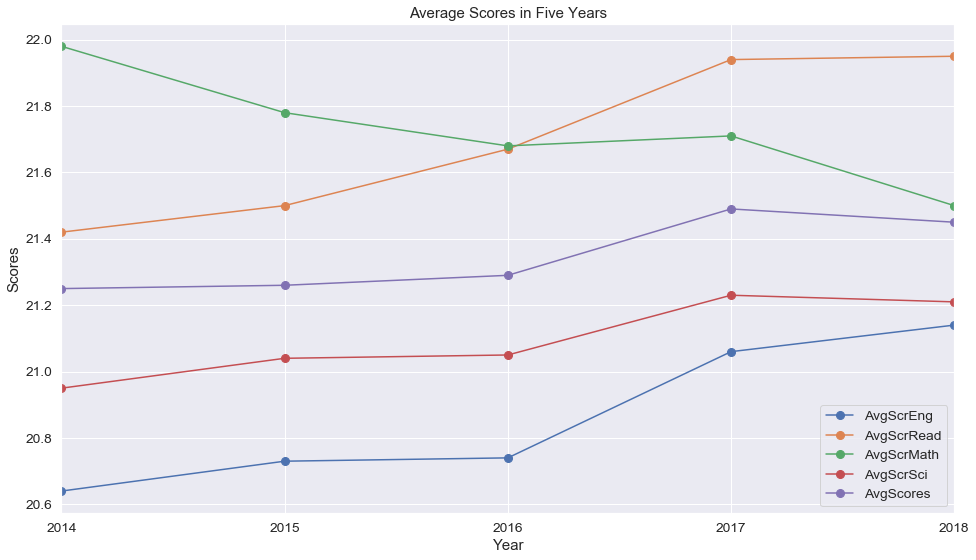

In [27]:
plt.figure(figsize=(16,9))
sch_mean = df2.groupby('Year')[['AvgScrEng','AvgScrRead','AvgScrMath','AvgScrSci','AvgScr']]
sch_mean = round(sch_mean.mean(),2)
_ = plt.plot(sch_mean, marker='o',markersize=8)

plt.legend(['AvgScrEng','AvgScrRead','AvgScrMath','AvgScrSci','AvgScores'])
plt.xticks(sch_mean.index)
plt.title('Average Scores in Five Years')
plt.xlabel('Year')
plt.ylabel('Scores')
plt.xlim(2014,2018)

plt.show()

While average reading, english and science scores are increasing in five years, average math scores are decreasing. On the other hand, overall scores are also increasing.


## 6. What kind of factors influence success levels?

## i. Ethnicity

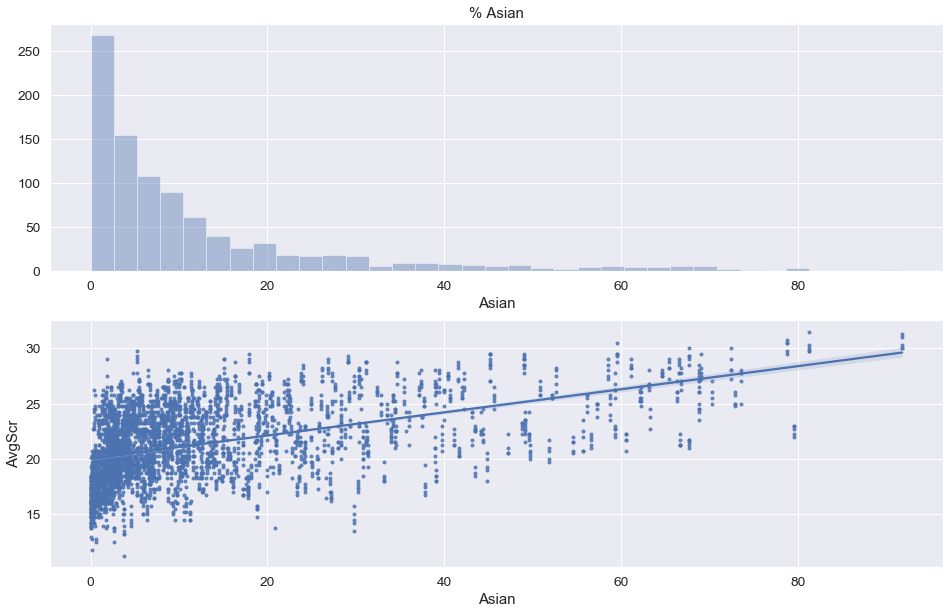

In [28]:
f, axes = plt.subplots(2,1, figsize=(16, 10))

_ = sns.distplot(df3['Asian'], kde=False, color="b", ax=axes[0], label='School Count', 
             bins=35).set_title('% Asian')
_ = sns.regplot(y=data["AvgScr"], x=data["Asian"], marker=".", color='b', ax=axes[1],
                truncate=True, line_kws={"color": "b"})


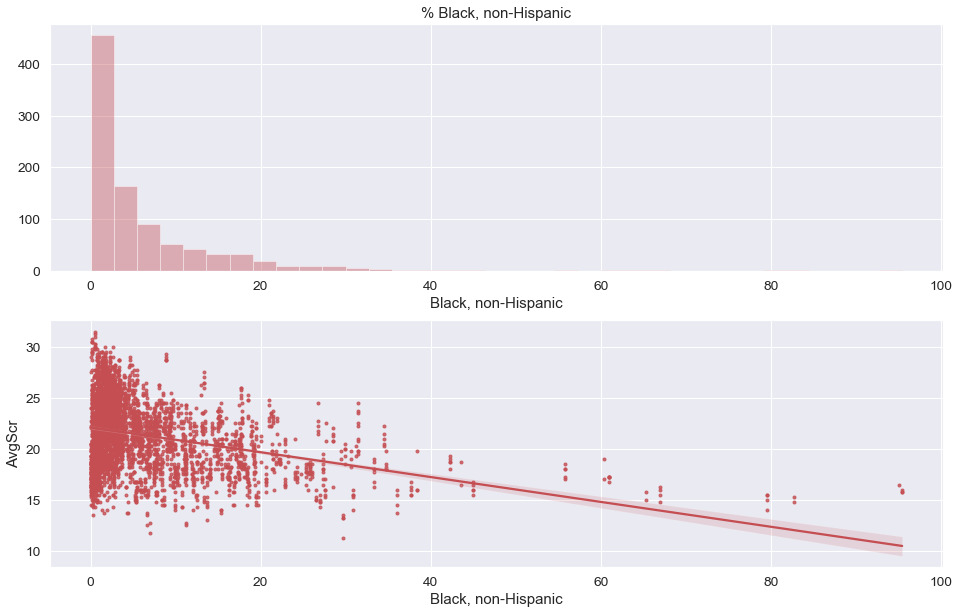

In [29]:
f, axes = plt.subplots(2,1, figsize=(16, 10))

_ = sns.distplot(df3['Black, non-Hispanic'], kde=False, color="r", ax=axes[0], label='School Count', 
             bins=35).set_title('% Black, non-Hispanic')
_ = sns.regplot(y=data["AvgScr"], x=data["Black, non-Hispanic"], marker=".", color='r', ax=axes[1],
                 truncate=True, line_kws={"color": "r"})

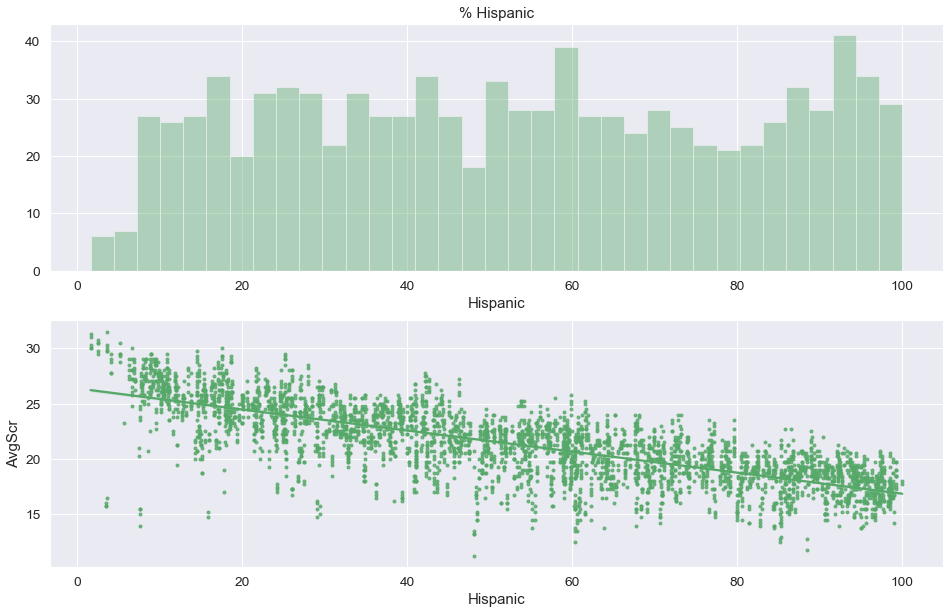

In [30]:
f, axes = plt.subplots(2,1, figsize=(16, 10))

_ = sns.distplot(df3['Hispanic'], kde=False, color="g", ax=axes[0], label='School Count', 
             bins=35).set_title('% Hispanic')
_ = sns.regplot(y=data["AvgScr"], x=data["Hispanic"], marker=".", color='g', ax=axes[1],
                 truncate=True, line_kws={"color": "g"})

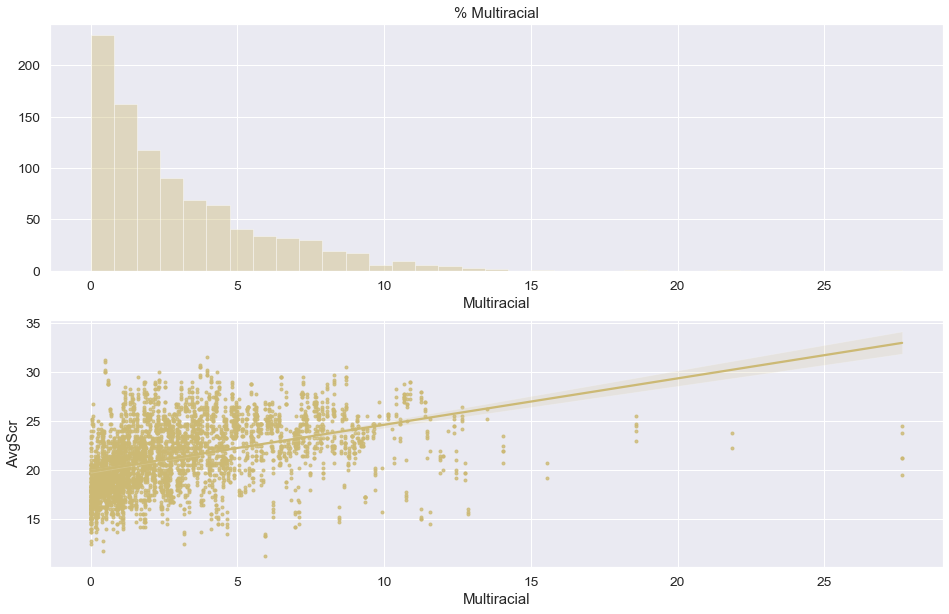

In [31]:
f, axes = plt.subplots(2,1, figsize=(16, 10))

_ = sns.distplot(df3['Multiracial'], kde=False, color="y", ax=axes[0], label='School Count', 
             bins=35).set_title('% Multiracial')
_ = sns.regplot(y=data["AvgScr"], x=data["Multiracial"], marker=".", color='y', ax=axes[1],
                 truncate=True, line_kws={"color": "y"})

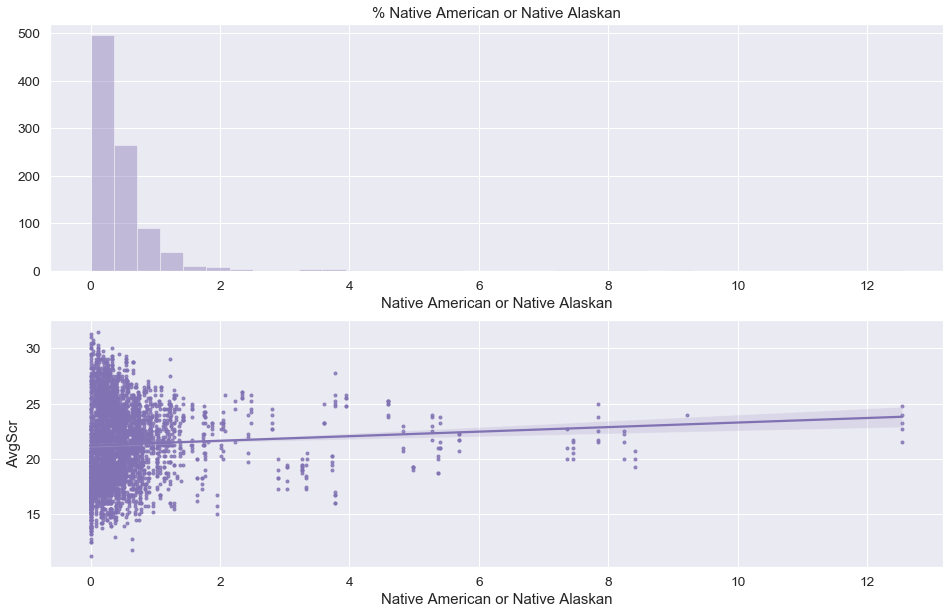

In [32]:
f, axes = plt.subplots(2,1, figsize=(16, 10))

_ = sns.distplot(df3['Native American or Native Alaskan'], kde=False, color="m", ax=axes[0], label='School Count', 
             bins=35).set_title('% Native American or Native Alaskan')
_ = sns.regplot(y=data["AvgScr"], x=data["Native American or Native Alaskan"], marker=".", color='m', ax=axes[1],
                 truncate=True, line_kws={"color": "m"})

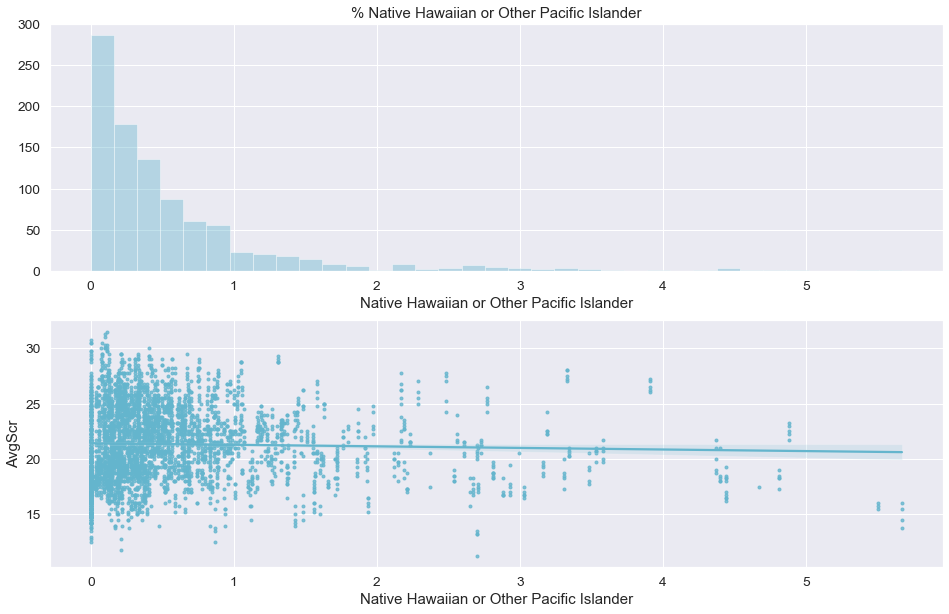

In [33]:
f, axes = plt.subplots(2,1, figsize=(16, 10))

_ = sns.distplot(df3['Native Hawaiian or Other Pacific Islander'], kde=False, color="c", ax=axes[0], label='School Count', 
             bins=35).set_title('% Native Hawaiian or Other Pacific Islander')
_ = sns.regplot(y=data["AvgScr"], x=data["Native Hawaiian or Other Pacific Islander"], marker=".", color='c', ax=axes[1],
                 truncate=True, line_kws={"color": "c"})

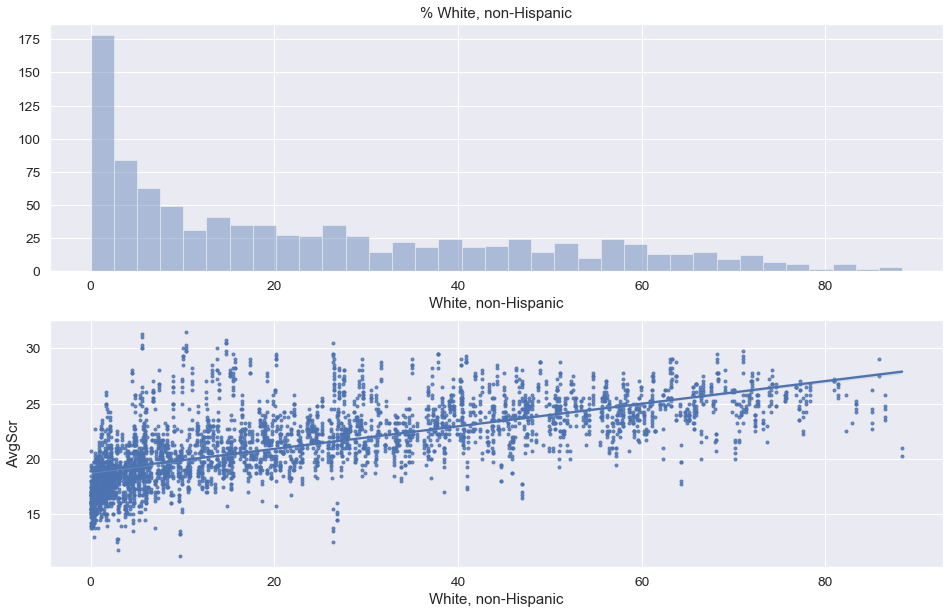

In [34]:
f, axes = plt.subplots(2,1, figsize=(16, 10))

_ = sns.distplot(df3['White, non-Hispanic'], kde=False, color="b", ax=axes[0], label='School Count', 
             bins=35).set_title('% White, non-Hispanic')
_ = sns.regplot(y=data["AvgScr"], x=data["White, non-Hispanic"], marker=".", color='b', ax=axes[1],
                 truncate=True, line_kws={"color": "b"})


## ii. Number of low income students

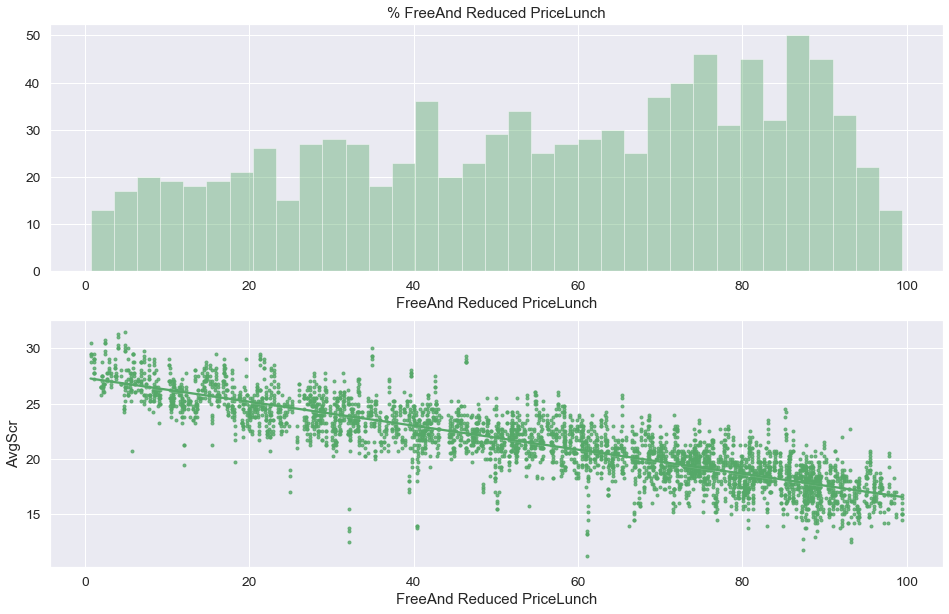

In [35]:
f, axes = plt.subplots(2,1, figsize=(16, 10))

_ = sns.distplot(df1['FreeAnd Reduced PriceLunch'], kde=False, color="g", ax=axes[0], label='School Count', 
             bins=35).set_title('% FreeAnd Reduced PriceLunch')
_ = sns.regplot(y=data["AvgScr"], x=data["FreeAnd Reduced PriceLunch"], marker=".", color='g', ax=axes[1],
                 truncate=True, line_kws={"color": "g"})

## iii. New teacher ratios

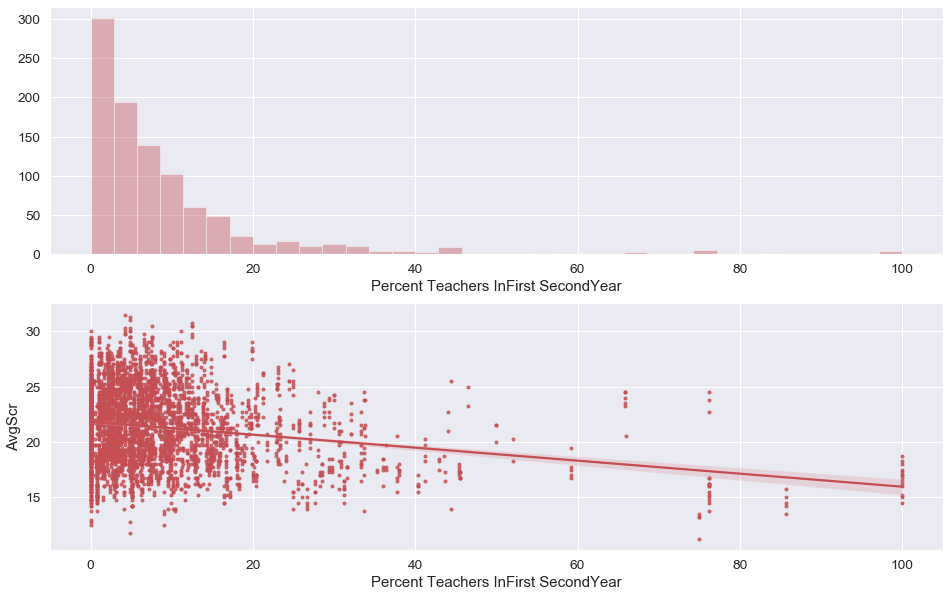

In [36]:
f, axes = plt.subplots(2,1, figsize=(16, 10))

_ = sns.distplot(df1['Percent Teachers InFirst SecondYear'], kde=False, color="r", ax=axes[0], label='School Count', 
             bins=35)
_ = sns.regplot(y=data["AvgScr"], x=data["Percent Teachers InFirst SecondYear"], marker=".", color='r', ax=axes[1],
                 truncate=True, line_kws={"color": "r"})

## iv. Population of the schools

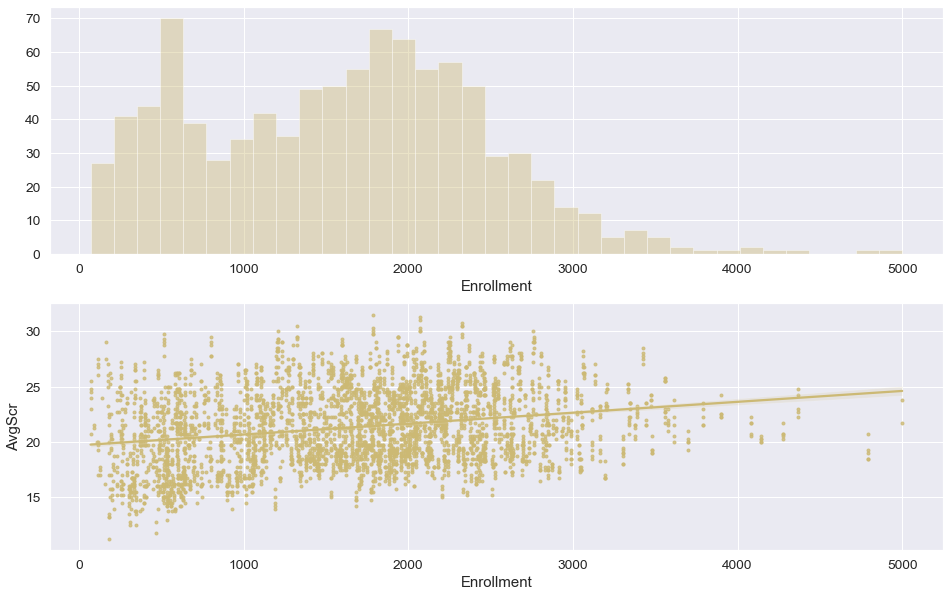

In [37]:
f, axes = plt.subplots(2,1, figsize=(16, 10))

_ = sns.distplot(df3['Enrollment'], kde=False, color="y", ax=axes[0], label='School Count', 
             bins=35)
_ = sns.regplot(y=data["AvgScr"], x=data["Enrollment"], marker=".", color='y', ax=axes[1],
                 truncate=True, line_kws={"color": "y"})

## 7. Are the parent ratings and great schools ratings related to the school success?

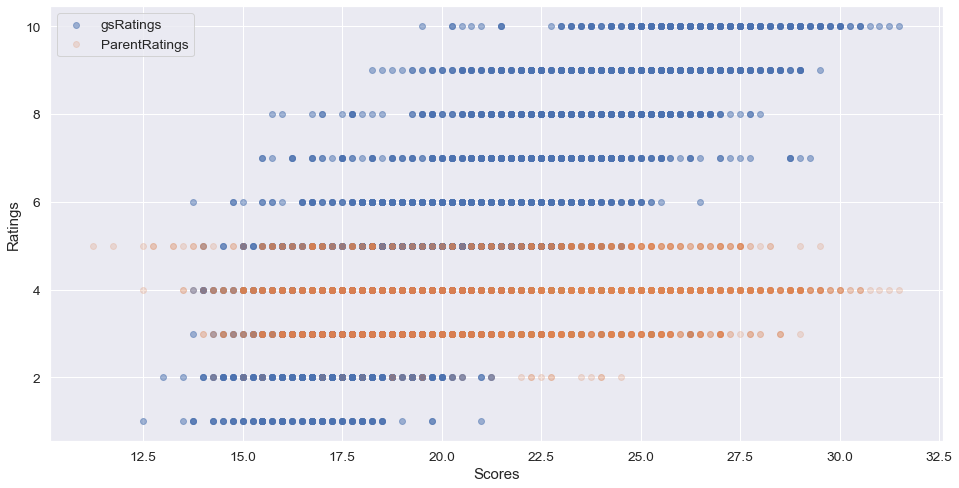

In [38]:
plt.figure(figsize=(16,8))
rt = data[['gsId','gsRating','ParentRating','AvgScr']]
_ = plt.scatter(x=rt['AvgScr'],y=rt['gsRating'],alpha=0.5, label='gsRatings')
_ = plt.scatter(x=rt['AvgScr'],y=rt['ParentRating'], alpha=0.2, label='ParentRatings')
_ = plt.legend(loc='upper left')
_ = plt.xlabel('Scores')
_ = plt.ylabel('Ratings')

As the Act scores are increasing, the great schools ratings are also increasing, but this is not true for parent ratings. We can conclude that there is a strong correlation between the great school ratings and school success, but the parent ratings are not related to the success.

# Correlation Matrix

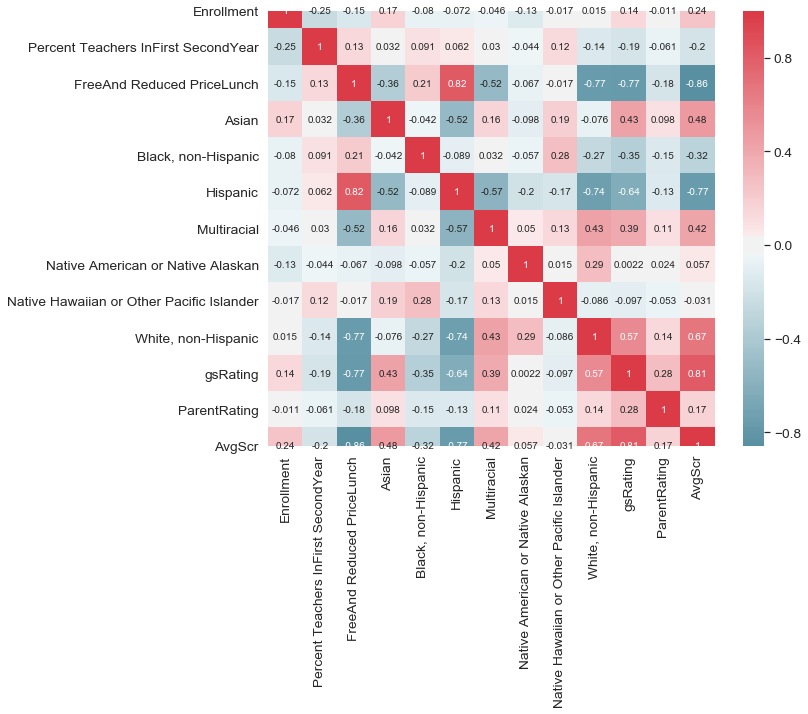

In [39]:
f, ax = plt.subplots(figsize=(10, 8))
df = data.iloc[:,[8,9,11,13,22,23,24,25,26,27,28,29,30,31]]
corr = df.corr()
#Correlation Matrix
#corr = (corr)
ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap=sns.diverging_palette(220, 10, as_cmap=True), center=0, annot=True)


Looking at the correlation matrix we can quickly see that:
* The percentage of Hispanic students are positively correlated to the number of students who receive free and reduced price lunch which represents the number of students with low income. 
* The percentage of White, non-Hispanic students are negatively correlated to the number of students who receive free and reduced price lunch.
* The great schools ratings are negatively correlated to the number of students who receive free and reduced price lunch, but positively correlated to the average Act scores.
* Overall average Act scores are negatively correlated to the number of students who receive free and reduced price lunch and also are negatively correlated to the percentage of Hispanic students.
* There is a strong negative correlation between the percentage of White, non-Hispanic students and Hispanic students.